<a href="https://colab.research.google.com/github/ssamadjon3106/PyTorch-with-Deep-Learning/blob/main/05_pytorch_going_modular_cell_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05. Going Modular: Part 1 (cell mode)

This notebook is part 1/2 of section [05. Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).

For reference, the two parts are:
1. [**05. Going Modular: Part 1 (cell mode)**](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/05_pytorch_going_modular_cell_mode.ipynb) - this notebook is run as a traditional Jupyter Notebook/Google Colab notebook and is a condensed version of [notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. [**05. Going Modular: Part 2 (script mode)**](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/05_pytorch_going_modular_script_mode.ipynb) - this notebook is the same as number 1 but with added functionality to turn each of the major sections into Python scripts, such as, `data_setup.py` and `train.py`.

Why two parts?

Because sometimes the best way to learn something is to see how it *differs* from something else.

If you run each notebook side-by-side you'll see how they differ and that's where the key learnings are.

## What is cell mode?

A cell mode notebook is a regular notebook run exactly how we've been running them through the course.

Some cells contain text and others contain code.

## What's the difference between this notebook (Part 1) and the script mode notebook (Part 2)?

This notebook, 05. PyTorch Going Modular: Part 1 (cell mode), runs a cleaned up version of the most useful code from section [04. PyTorch Custom Datasets](https://www.learnpytorch.io/04_pytorch_custom_datasets/).

Running this notebook end-to-end will result in recreating the image classification model we built in notebook 04 (TinyVGG) trained on images of pizza, steak and sushi.

The main difference between this notebook (Part 1) and Part 2 is that each section in Part 2 (script mode) has an extra subsection (e.g. 2.1, 3.1, 4.1) for turning cell code into script code.

## Where can you get help?

You can find the book version of this section [05. PyTorch Going Modular on learnpytorch.io](https://www.learnpytorch.io/05_pytorch_going_modular/).

The rest of the materials for this course [are available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

## 0. Running a notebook in cell mode

As discussed, we're going to be running this notebook normally.

One cell at a time.

The code is from notebook 04, however, it has been condensed down to its core functionality.

In [1]:
!rm -rf models/

## 1. Get data

We're going to start by downloading the same data we used in [notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/#1-get-data), the `pizza_steak_sushi` dataset with images of pizza, steak and sushi.

In [2]:
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [45]:
%%writefile going_modular/get_data.py
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"


Writing going_modular/get_data.py


In [48]:
!python going_modular/get_data.py

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, sushi data...


## 2. Create Datasets and DataLoaders

Now we'll turn the image dataset into PyTorch `Dataset`'s and `DataLoader`'s.

In [4]:
from torchvision import datasets, transforms

# Create simple transform
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [5]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [6]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [7]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [8]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f1ceae91880>,
 <torch.utils.data.dataloader.DataLoader at 0x7f1ccab58ad0>)

In [9]:
# Check out single image size/shape
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [28]:
# 2.1 sctipt mode
os.makedirs('going_modular')

In [29]:
%%writefile going_modular/data_setup.py
"""
Contains functionality for creating PyTorch DataLoaders for
image classification data.
"""
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directory path and turns
  them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = \
        = create_dataloaders(train_dir=path/to/train_dir,
                             test_dir=path/to/test_dir,
                             transform=some_transform,
                             batch_size=32,
                             num_workers=4)
  """
  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False, # don't need to shuffle test data
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

Writing going_modular/data_setup.py


## 3. Making a model (TinyVGG)

We're going to use the same model we used in notebook 04: TinyVGG from the CNN Explainer website.

The only change here from notebook 04 is that a docstring has been added using [Google's Style Guide for Python](https://google.github.io/styleguide/pyguide.html#384-classes).

In [30]:
import torch

from torch import nn

class TinyVGG(nn.Module):
  """Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from the CNN explainer website in PyTorch.
  See the original architecture here: https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3, # how big is the square that's going over the image?
                    stride=1, # default
                    padding=0), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2) # default stride value is same as kernel_size
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          # Where did this in_features shape come from?
          # It's because each layer of our network compresses and changes the shape of our inputs data.
          nn.Linear(in_features=hidden_units*13*13,
                    out_features=output_shape)
      )

  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.classifier(x)
      return x
      # return self.classifier(self.block_2(self.block_1(x))) # <- leverage the benefits of operator fusion

In [31]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate an instance of the model
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

To test our model let's do a single forward pass (pass a sample batch from the training set through our model).

In [32]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0208, -0.0020,  0.0095]])

Output prediction probabilities:
tensor([[0.3371, 0.3295, 0.3333]])

Output prediction label:
tensor([0])

Actual label:
0


In [33]:
%%writefile going_modular/model_builder.py
import torch
from torch import nn

class TinyVGG(nn.Module):
  """Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from the CNN explainer website in PyTorch.
  See the original architecture here: https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3, # how big is the square that's going over the image?
                    stride=1, # default
                    padding=0), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2) # default stride value is same as kernel_size
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          # Where did this in_features shape come from?
          # It's because each layer of our network compresses and changes the shape of our inputs data.
          nn.Linear(in_features=hidden_units*13*13,
                    out_features=output_shape)
      )

  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.classifier(x)
      return x


Writing going_modular/model_builder.py


In [34]:
from going_modular import model_builder

In [35]:
import torch
from torch import nn
device='cuda' if torch.cuda.is_available() else 'cpu'
from going_modular import model_builder
model_1=model_builder.TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes)).to(device)
model_1


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## 4. Creating `train_step()` and `test_step()` functions and `train()` to combine them  

Rather than writing them again, we can reuse the `train_step()` and `test_step()` functions from [notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/#75-create-train-test-loop-functions).

The same goes for the `train()` function we created.

The only difference here is that these functions have had docstrings added to them in [Google's Python Functions and Methods Style Guide](https://google.github.io/styleguide/pyguide.html#383-functions-and-methods).

Let's start by making `train_step()`.

In [36]:
from typing import Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

Now we'll do `test_step()`.

In [37]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

And we'll combine `train_step()` and `test_step()` into `train()`.

In [38]:
from typing import Dict, List

from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List[float]]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results

In [39]:
%%writefile going_modular/engine.py

import torch # Add this import
from typing import Tuple, Dict, List # Add Dict and List

from tqdm.auto import tqdm
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List[float]]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results


Writing going_modular/engine.py


## 5. Creating a function to save the model

Let's setup a function to save our model to a directory.

In [40]:
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)

In [41]:
%%writefile going_modular/utils.py
import torch
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)


Writing going_modular/utils.py


## 6. Train, evaluate and save the model

Let's leverage the functions we've got above to train, test and save a model to file.


In [42]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

# Save the model
save_model(model=model_0,
           target_dir="models",
           model_name="05_going_modular_cell_mode_tinyvgg_model.pth")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0923 | train_acc: 0.3911 | test_loss: 1.0727 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0273 | train_acc: 0.5156 | test_loss: 1.0164 | test_acc: 0.4267
Epoch: 3 | train_loss: 0.9614 | train_acc: 0.5111 | test_loss: 0.9927 | test_acc: 0.4667
Epoch: 4 | train_loss: 0.9160 | train_acc: 0.5733 | test_loss: 0.9778 | test_acc: 0.4133
Epoch: 5 | train_loss: 0.8875 | train_acc: 0.6089 | test_loss: 0.9868 | test_acc: 0.5067
[INFO] Total training time: 17.215 seconds
[INFO] Saving model to: models/05_going_modular_cell_mode_tinyvgg_model.pth


In [57]:
%%writefile going_modular/train.py
import os
import sys # Import sys
from timeit import default_timer as timer

import torch
from torchvision import datasets, transforms

# Add the parent directory to sys.path to allow imports from going_modular
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

from going_modular import data_setup, engine, get_data, model_builder, utils

import argparse
parser=argparse.ArgumentParser()

#Add an argument for using a different:
#Training/testing directory
parser.add_argument("--train_dir",
                    default='data/pizza_steak_sushi/train',
                    type=str,
                    help='Directory file path to training data in standard image classification format')

parser.add_argument("--test_dir",
                    default='data/pizza_steak_sushi/test', # Corrected default to test directory
                    type=str,
                    help='Directory file path to test data in standard image classification format')

#Learning rate
parser.add_argument('--learning_rate',
                    default=0.001,
                    type=float,
                    help='Learning rate to use model')
#Batch size
parser.add_argument('--batch_size',
                    default=32,
                    type=int,
                    help='number of batched per sample')
#Number of epochs to train for
parser.add_argument('--num_epochs',
                    default=10,
                    type=int,
                    help='The number of epochs to train for')
#Number of hidden units in the TinyVGG model
parser.add_argument('--hidden_units',
                    default=10,
                    type=int,
                    help="Number of hidden units in the TinyVGG model")

args=parser.parse_args()

# Setup hyperparameters
BATCH_SIZE=args.batch_size
NUM_EPOCHS=args.num_epochs
HIDDEN_UNITS=args.hidden_units
LEARNING_RATE=args.learning_rate
print(f"[INFO] Training a model for {NUM_EPOCHS} epochs with batch size {BATCH_SIZE} using {HIDDEN_UNITS} hidden units and a learning rate of {LEARNING_RATE}")
# Setup directories

train_dir=args.train_dir
test_dir=args.test_dir # Corrected assignment to args.test_dir
print(f"[INFO] Training data file: {train_dir}")
print(f"[INFO] Testing data file: {test_dir}")
# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

# Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

# Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# Save the model with help from utils.py
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")


utils.save_model(model=model, target_dir='models', model_name='05_going_modular_TinyVGG_model.pth') # Added .pth extension to model_name


Overwriting going_modular/train.py


In [58]:
!PYTHONPATH=/content python going_modular/train.py --num_epochs 5 --batch_size 128 --hidden_units 128 --learning_rate 0.0003

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, sushi data...
[INFO] Training a model for 5 epochs with batch size 128 using 128 hidden units and a learning rate of 0.0003
[INFO] Training data file: data/pizza_steak_sushi/train
[INFO] Testing data file: data/pizza_steak_sushi/test
  0% 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Epoch: 1 | train_loss: 1.1062 | train_acc: 0.2786 | test_loss: 1.0920 | test_acc: 0.4667
 20% 1/5 [00:32<02:09, 32.48s/it]Epoch: 2 | train_loss: 1.0892 | train_acc: 0.4609 | test_loss: 1.0836 | test_acc: 0.3733
 40% 2/5 [01:02<01:32, 30.82s/it]Epoch: 3 | train_loss: 1.0704 | train_acc: 0.4273 | test_loss: 1.0708 | test_acc: 0.4000
 60% 3/5 [01:32<01:01, 30.69s/it]Epoch: 4 | train_loss: 1.0339 | train_acc: 0.4935 | test_loss: 1.0502 | test_acc: 0.3467

In [44]:
import torch
!PYTHONPATH=/content python going_modular/train.py

  0% 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Epoch: 1 | train_loss: 1.0968 | train_acc: 0.3984 | test_loss: 1.1001 | test_acc: 0.2604
 20% 1/5 [00:02<00:09,  2.27s/it]Epoch: 2 | train_loss: 1.1037 | train_acc: 0.3047 | test_loss: 1.1039 | test_acc: 0.2604
 40% 2/5 [00:04<00:06,  2.30s/it]Epoch: 3 | train_loss: 1.1063 | train_acc: 0.2930 | test_loss: 1.0726 | test_acc: 0.5455
 60% 3/5 [00:06<00:04,  2.06s/it]Epoch: 4 | train_loss: 1.0949 | train_acc: 0.3711 | test_loss: 1.0921 | test_acc: 0.2803
 80% 4/5 [00:08<00:01,  1.96s/it]Epoch: 5 | train_loss: 1.0564 | train_acc: 0.4453 | test_loss: 1.0330 | test_acc: 0.6042
100% 5/5 [00:10<00:00,  2.19s/it]
[INFO] Total training time: 10.960 seconds
[INFO] Saving model to: models/05_going_modular_TinyVGG_model.pth


We finish with a saved image classification model at `models/05_going_modular_cell_mode_tinyvgg_model.pth`.

The code continues in [05. Going Modular: Part 2 (script mode)](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/05_pytorch_going_modular_script_mode.ipynb).

In [63]:
%%writefile predict.py
import torch
import torchvision
import argparse

from going_modular import model_builder

# Creating a parser
parser = argparse.ArgumentParser()

# Get an image path
parser.add_argument("--image",
                    help="target image filepath to predict on")

# Get a model path
parser.add_argument("--model_path",
                    default="models/05_going_modular_script_mode_tinyvgg_model.pth",
                    type=str,
                    help="target model to use for prediction filepath")

args = parser.parse_args()

# Setup class names
class_names = ["pizza", "steak", "sushi"]

# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Get the image path
IMG_PATH = args.image
print(f"[INFO] Predicting on {IMG_PATH}")

# Function to load in the model
def load_model(filepath=args.model_path):
  # Need to use same hyperparameters as saved model
  model = model_builder.TinyVGG(input_shape=3,
                                hidden_units=128,
                                output_shape=3).to(device)

  print(f"[INFO] Loading in model from: {filepath}")
  # Load in the saved model state dictionary from file
  model.load_state_dict(torch.load(filepath))

  return model

# Function to load in model + predict on select image
def predict_on_image(image_path=IMG_PATH, filepath=args.model_path):
  # Load the model
  model = load_model(filepath)

  # Load in the image and turn it into torch.float32 (same type as model)
  image = torchvision.io.read_image(str(IMG_PATH)).type(torch.float32)

  # Preprocess the image to get it between 0 and 1
  image = image / 255.

  # Resize the image to be the same size as the model
  transform = torchvision.transforms.Resize(size=(64, 64))
  image = transform(image)

  # Predict on image
  model.eval()
  with torch.inference_mode():
    # Put image to target device
    image = image.to(device)

    # Get pred logits
    pred_logits = model(image.unsqueeze(dim=0)) # make sure image has batch dimension (shape: [batch_size, height, width, color_channels])

    # Get pred probs
    pred_prob = torch.softmax(pred_logits, dim=1)

    # Get pred labels
    pred_label = torch.argmax(pred_prob, dim=1)
    pred_label_class = class_names[pred_label]

  print(f"[INFO] Pred class: {pred_label_class}, Pred prob: {pred_prob.max():.3f}")

if __name__ == "__main__":
  predict_on_image()

Overwriting predict.py


In [64]:
!PYTHONPATH=/content python predict.py --image data/pizza_steak_sushi/test/sushi/175783.jpg

[INFO] Predicting on data/pizza_steak_sushi/test/sushi/175783.jpg
[INFO] Loading in model from: models/05_going_modular_script_mode_tinyvgg_model.pth
[INFO] Pred class: sushi, Pred prob: 0.439


(np.float64(-0.5), np.float64(511.5), np.float64(381.5), np.float64(-0.5))

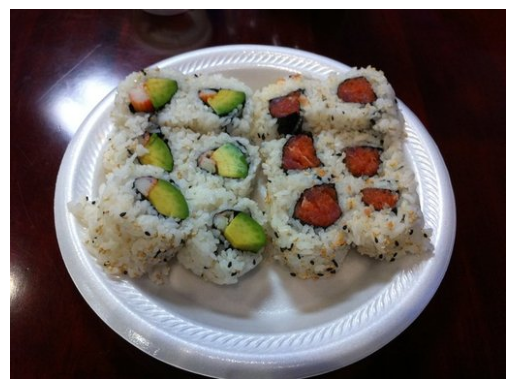

In [66]:
import matplotlib.pyplot as plt
from PIL import Image
image_path='data/pizza_steak_sushi/test/sushi/175783.jpg'
img=Image.open(image_path)
plt.imshow(img)
plt.axis('off')